In [2]:
!pip install quandl
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
file_path = 'C:/Users/luis/Desktop/Carrer Foundry boot camp/Advanced Analytics & Dashboard Design/Data/Prepared Data/merged_winners.csv'

In [4]:
df = pd.read_csv(file_path)

In [8]:
df.columns

Index(['Fighter', 'Fight Date', 'Fight Location', 'City', 'State', 'Country',
       'Winner', 'Is Title Bout', 'Weight Class', 'Average Knockdowns',
       'Average Knockdowns Taken', 'Average Significant Strikes Percentage',
       'Average Significant Strikes Percentage Taken',
       'Average Takedown Percentage', 'Average Takedown Percentage Taken',
       'Average Submission Attempts', 'Average Submission Attempts Taken',
       'Average Reversals', 'Average Reversals Taken',
       'Average Significant Strikes Attempted',
       'Average Significant Strikes Landed',
       'Average Significant Strikes Attempted Taken',
       'Average Significant Strikes Landed Taken',
       'Average Total Strikes Attempted', 'Average Total Strikes Landed',
       'Average Total Strikes Attempted Taken',
       'Average Total Strikes Landed Taken', 'Average Takedown Attempts',
       'Average Takedowns Landed', 'Average Takedown Attempts Taken',
       'Average Takedowns Landed Taken', 'Average

In [9]:
# Group the data by Fighter and sum the Wins for each fighter
fighter_wins = df.groupby('Fighter')['Wins'].sum().reset_index()

# Sort the results by Wins in descending order
fighter_most_wins = fighter_wins.sort_values(by='Wins', ascending=False)

# Display the fighter with the most wins
most_wins_fighter = fighter_most_wins.iloc[0]
print(f"Fighter with the most wins: {most_wins_fighter['Fighter']} with {most_wins_fighter['Wins']} wins.")


Fighter with the most wins: Donald Cerrone with 253 wins.


In [18]:
# Display the data types of each column in the dataframe df
df.dtypes


Fighter                  object
Fight Date               object
Fight Location           object
City                     object
State                    object
                         ...   
Fighter Stance           object
Fighter Height (cm)     float64
Fighter Reach (cm)      float64
Fighter Weight (lbs)    float64
Fighter Age               int64
Length: 77, dtype: object

In [21]:
# Create a subset with 'Fight Date' and 'Wins' for Donald Cerrone
cerrone_subset = df[df['Fighter'] == 'Donald Cerrone'][['Fight Date', 'Wins']]

# Convert 'Fight Date' to datetime format
cerrone_subset['Fight Date'] = pd.to_datetime(cerrone_subset['Fight Date'])

# Sort the subset by 'Fight Date'
cerrone_subset = cerrone_subset.sort_values(by='Fight Date')

# Display the sorted subset
cerrone_subset.head()


,Fight Date,Wins
2579,2011-02-05,0
5754,2011-06-11,1
2498,2011-08-14,2
5717,2011-10-29,3
2346,2012-05-15,4


### For this analysis, I chose to focus specifically on the fight history of Donald Cerrone, the fighter with the most wins in the dataset. The subset includes only the columns "Fight Date" and "Wins" for Cerrone, as these columns are crucial for understanding the progression of his career over time.

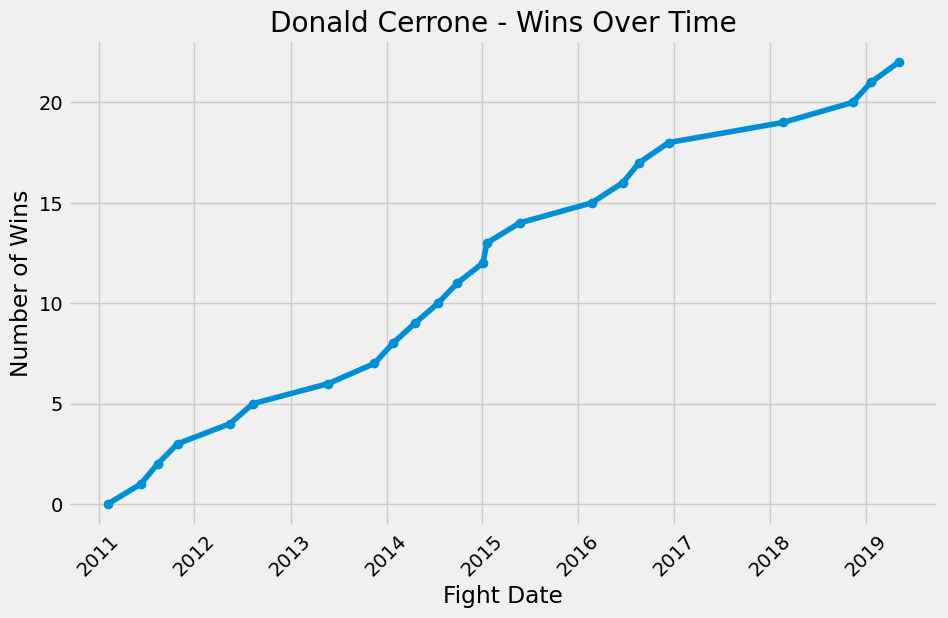

In [22]:
# Plot the number of wins over time
plt.figure(figsize=(10, 6))
plt.plot(cerrone_subset['Fight Date'], cerrone_subset['Wins'], marker='o', linestyle='-')
plt.title('Donald Cerrone - Wins Over Time')
plt.xlabel('Fight Date')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

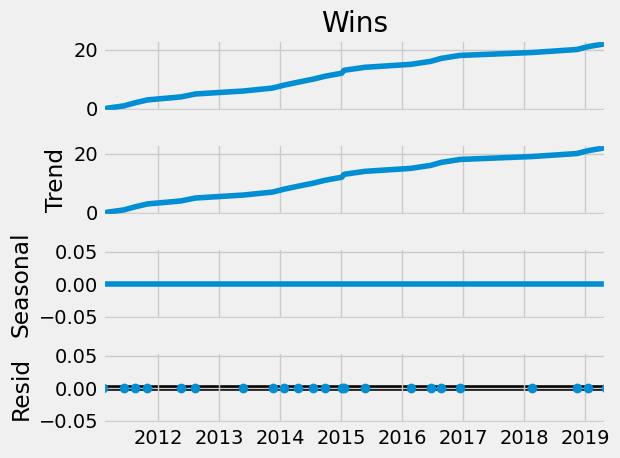

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Fight Date' column as the index if it's not already
cerrone_subset.set_index('Fight Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(cerrone_subset['Wins'], model='additive', period=1)

# Plot the decomposed components
decomposition.plot()
plt.show()

### Decomposition Analysis

The decomposition of Donald Cerrone's wins over time reveals three important components:

1. **Trend**: 
   - The trend component shows a consistent upward trajectory, indicating that Cerrone has been accumulating wins steadily over the years. This upward slope confirms that his performance has been strong and improving over time.

2. **Seasonality**: 
   - The seasonal component is flat, indicating that there is no evident seasonal pattern to his wins. This is consistent with UFC fights, where the number of wins is not expected to fluctuate according to a seasonal cycle, as the sport is not seasonal in nature.

3. **Residuals**: 
   - The residuals show minimal variation, meaning that there are very few unexplained fluctuations. This suggests that the data is well explained by the trend, with very little irregularity or unexpected changes. Most deviations from the trend are insignificant.

**Conclusion**: 
   - The decomposition highlights that the main factor driving Donald Cerrone’s performance is the consistent upward trend in wins, with no significant seasonality or anomalies present in the residuals.


In [24]:
from statsmodels.tsa.stattools import adfuller

# Conduct the Dickey-Fuller test on the 'Wins' column
result = adfuller(cerrone_subset['Wins'])

# Extract the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Display the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')


ADF Statistic: 0.938226462720402
p-value: 0.9935694536890787
Critical Values: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}


### Dickey-Fuller Test Results Interpretation

- **ADF Statistic:** 0.938
- **p-value:** 0.993
- **Critical Values:** {'1%': -3.833, '5%': -3.031, '10%': -2.656}

#### Null Hypothesis:
The time series is non-stationary.

#### Interpretation:
With a p-value of 0.993 (much greater than 0.05), we fail to reject the null hypothesis, which means the time series is non-stationary. In other words, the wins data for Donald Cerrone does not exhibit stationarity, implying there are trends or patterns over time rather than random fluctuations.

The ADF statistic is positive and much higher than the critical values, further reinforcing the result that the data is non-stationary.


In [28]:
# Check the differenced data
print(cerrone_subset['Wins_Diff'].dropna())

Fight Date
2011-06-11    1.0
2011-08-14    1.0
2011-10-29    1.0
2012-05-15    1.0
2012-08-11    1.0
2013-05-25    1.0
2013-11-16    1.0
2014-01-25    1.0
2014-04-19    1.0
2014-07-16    1.0
2014-09-27    1.0
2015-01-03    1.0
2015-01-18    1.0
2015-05-23    1.0
2016-02-21    1.0
2016-06-18    1.0
2016-08-20    1.0
2016-12-10    1.0
2018-02-18    1.0
2018-11-10    1.0
2019-01-19    1.0
2019-05-04    1.0
Name: Wins_Diff, dtype: float64


### Analysis of Differenced Data:

The output confirms that after differencing, the resulting values are all constant (1.0). This indicates that each fight incremented Donald Cerrone's win count by exactly 1. As a result, the time series doesn't exhibit any further trends or seasonality that differencing could reveal.

Conducting another Dickey-Fuller test on this differenced data is unnecessary, as the constant differenced values do not offer new insights. This suggests that Donald Cerrone's win progression over time is steady and consistent, with no clear seasonality or significant variance in the number of wins.

Given these findings, traditional time series analysis techniques like ARIMA may not provide additional value, since the data doesn't display the complexity needed for such methods. Further analysis should focus on other potential performance metrics or variables that might show more variability or trends over time.